In [1]:
## VAMO LÁ TIME
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

from colors import *

In [2]:
jorel = 'imgs/jorel.jpeg'
steven = 'imgs/steven.jpeg'

img_j = Image.open(jorel)
img_s = Image.open(steven)

In [5]:
data_j = np.asarray(img_j.resize((250,250)).getdata())
data_j = data_j.flatten()
data_j.shape

(187500,)

In [6]:
data_s = np.asarray(img_s.resize((250,250)).getdata()).flatten()
data_s.shape

(187500,)

In [7]:
import os
all_data = np.array([])
teste = np.array([])

In [8]:
for idx, val in enumerate(os.listdir('imgs/')):
    img = Image.open('imgs/' + val)
    print(val)
    data = np.asarray(img.resize((250,250)).getdata()).flatten()
    print("DATA {}".format(data.shape))
    teste = np.append(teste, data)
    if idx == 0:
        all_data = data
    else:
        all_data = np.vstack((all_data, np.expand_dims(data, axis=0)))
    
all_data.shape

steven.jpeg
DATA (187500,)
jorel.jpeg
DATA (187500,)
stevn1.jpeg
DATA (187500,)
salem.jpeg
DATA (187500,)
akira.jpg
DATA (187500,)


(5, 187500)

In [9]:
def most_frequent_colour(image):
    w, h = image.size
    pixels = image.getcolors(w * h)
    most_frequent_pixel = pixels[0]
    for count, colour in pixels:
        if count > most_frequent_pixel[0]:
            most_frequent_pixel = (count, colour)

    compare("Most Common", image, most_frequent_pixel[1])
    return most_frequent_pixel

def compare(title, image, colour_tuple):
    image.show(title=title)
    image = Image.new("RGB", (200, 200,), colour_tuple)
    return image

In [27]:
def get_palette(img_path, colors=5, kmeans=3, verbose=False):
    img = Image.open(img_path)
    w, h = img.size
    #colors = img_j.getcolors(h*w)
    img_quantized = img.quantize(colors=colors, kmeans=kmeans)
    img_palette = img_quantized.getpalette()[:colors*3]

    img_colors = []
    for i in range(0, len(img_palette)-1, 3): 
        img_colors.append(img_palette[i:i+3])

    if verbose:
        print(img_quantized.getcolors(w*h))
        print(img_palette)
        print(img_colors)
    show_colors(img_colors)
    
    return img_quantized, img_palette, img_colors

In [38]:
def compare(colors_1, colors_2):
    colors_1 = np.asarray(colors_1)
    colors_2 = np.asarray(colors_2)

    dist_array = []
    idx = []
    for i in range(0, len(colors_1)):
        for j in range(0, len(colors_1)):
            idx.append([colors_2[i], colors_2[j]])
            dist_array.append(distance(colors_1[i], colors_2[j]))

    print(dist_array)
    indexes = np.argsort(dist_array)
    
    return indexes

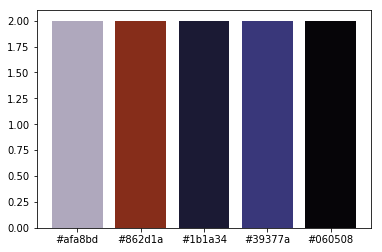

In [41]:
s1quant, s1palette, s1color = get_palette('imgs/sof1.jpeg')

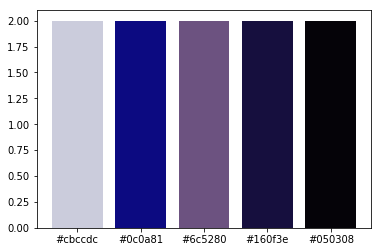

In [42]:
s2quant, s2palette, s2color = get_palette('imgs/sof2.jpeg')

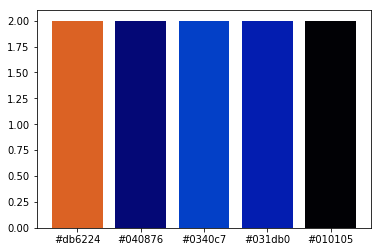

(<PIL.Image.Image image mode=P size=1277x1280 at 0x7FAB1BD58860>,
 [219, 98, 36, 4, 8, 118, 3, 64, 199, 3, 29, 176, 1, 1, 5],
 [[219, 98, 36], [4, 8, 118], [3, 64, 199], [3, 29, 176], [1, 1, 5]])

In [31]:
get_palette('imgs/sof3.jpeg')

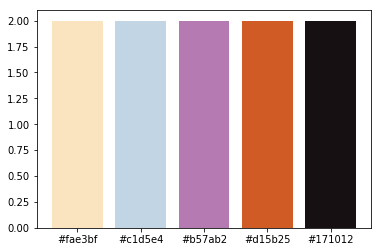

(<PIL.Image.Image image mode=P size=1280x720 at 0x7FAB199B3F98>,
 [250, 227, 191, 193, 213, 228, 181, 122, 178, 209, 91, 37, 23, 16, 18],
 [[250, 227, 191],
  [193, 213, 228],
  [181, 122, 178],
  [209, 91, 37],
  [23, 16, 18]])

In [32]:
get_palette('imgs/jorel.jpeg')

[55.14526271584895, 234.8041737278109, 124.92397688194208, 250.89240721871198, 298.13755214665593, 260.14995675571424, 163.45641620933696, 111.57508682497182, 121.40840168620952, 136.85393673548452, 301.4697331408246, 80.06247560499239, 124.39051410778879, 15.684387141358123, 54.30469592954186, 230.47993405066742, 64.02343321003646, 58.01723881744115, 80.15609770940699, 135.66134305689297, 351.2178810937735, 121.25180411028943, 175.30829986055994, 57.201398584300364, 2.23606797749979]


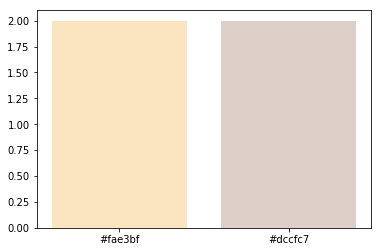

In [40]:
idxs = compare(s1color, s2color)

show_colors(idx[indexes[1]])

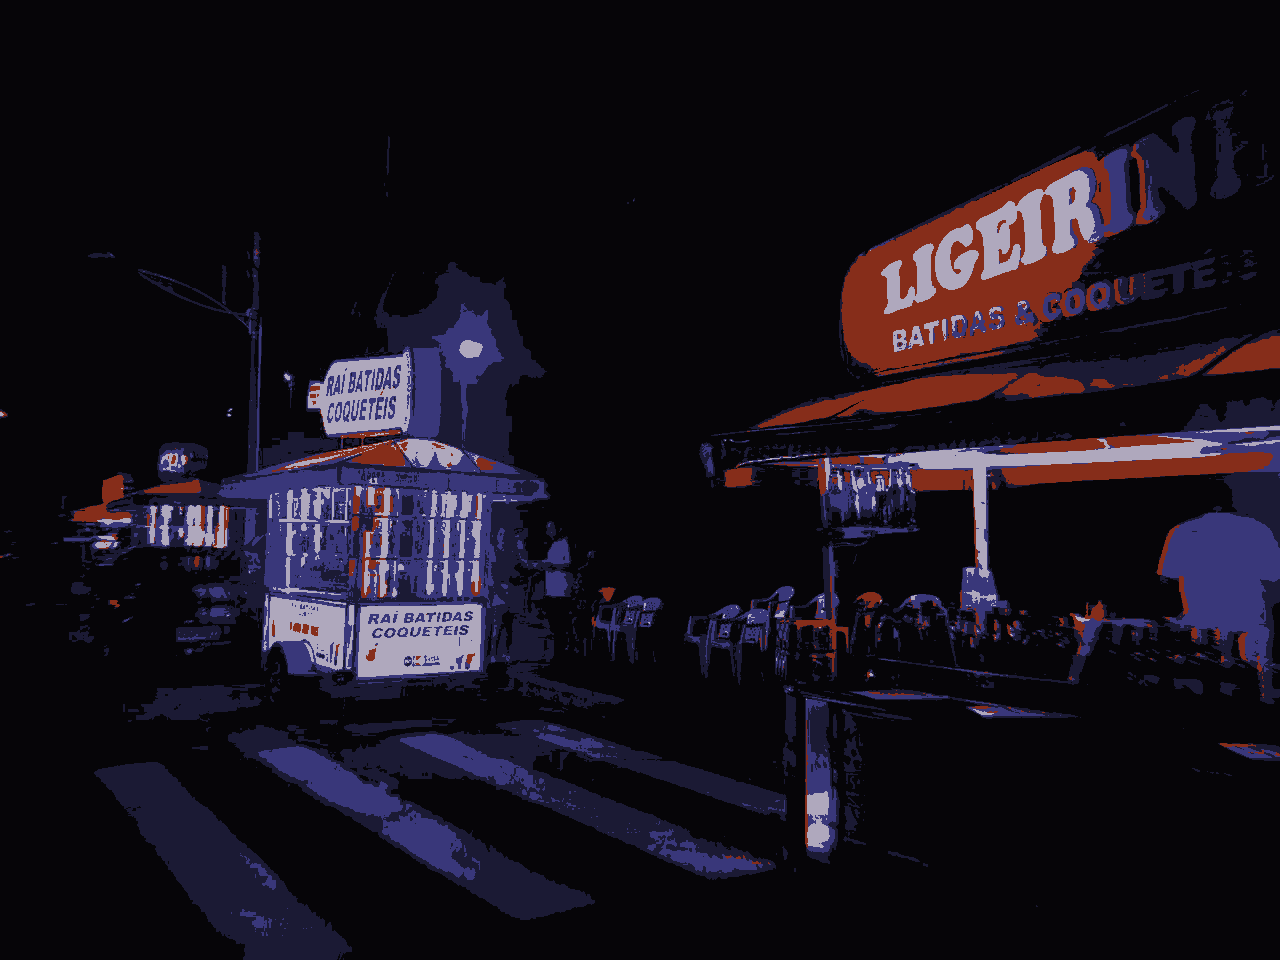

In [44]:
s1quant

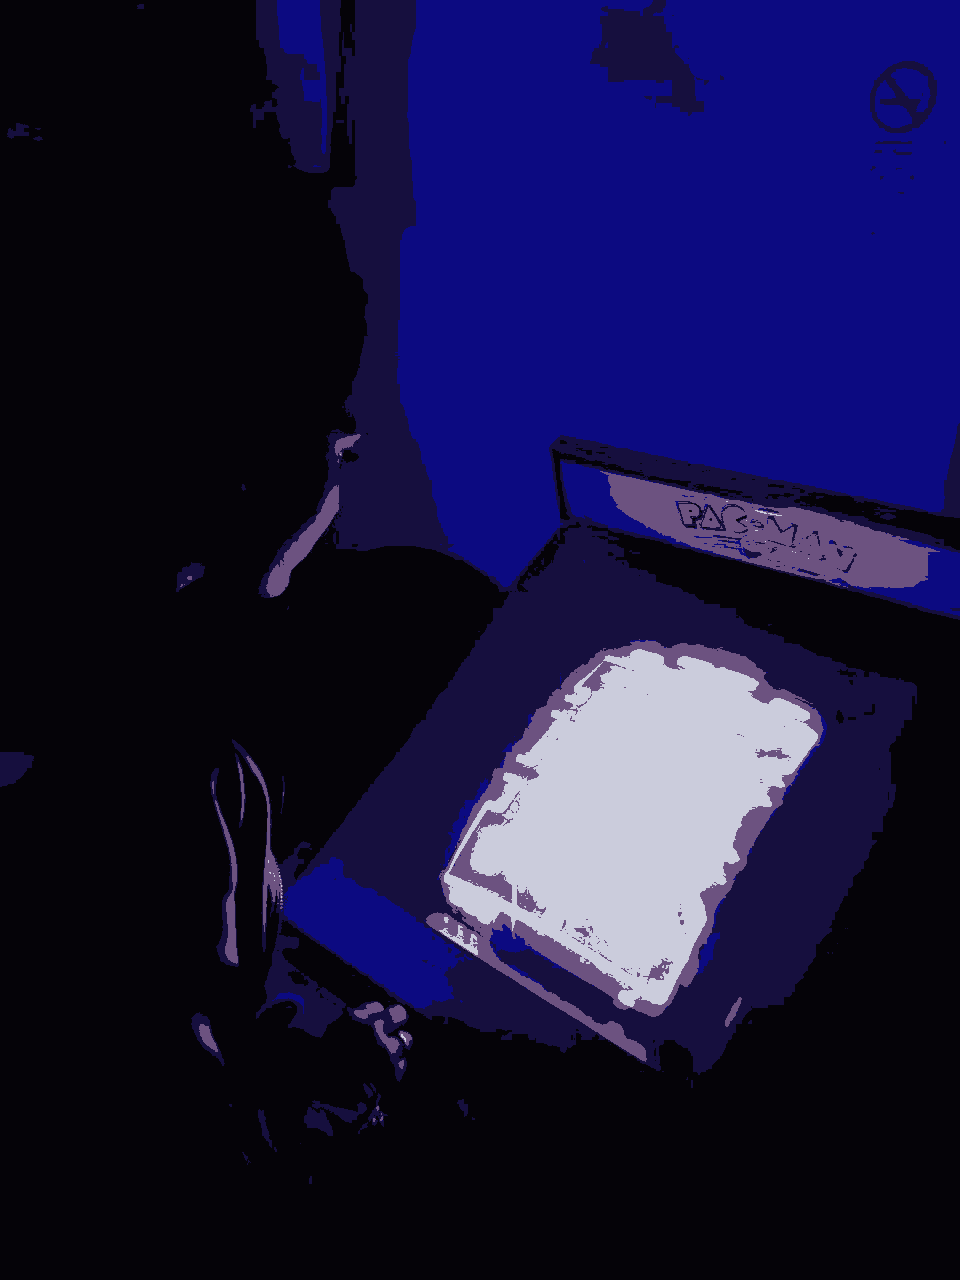

In [45]:
s2quant